In [1]:
## Exercise 2: Logistic Regression

%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

from scipy.optimize import minimize

In [2]:
# Load data
data = np.loadtxt('../ex2/ex2data1.txt', delimiter=',')
X = data[:, :2]
y = data[:, 2]

In [3]:
## Part 1: Plotting

def plotData(X, y):
    pos = X[y == 1]
    neg = X[y == 0]

    plt.plot(pos[:, 0], pos[:, 1], 'k+', linewidth=2, markersize=7)
    plt.plot(neg[:, 0], neg[:, 1], 'ko', markerfacecolor='y', markersize=7)

Plotting data with + indicating (y = 1) examples and o indicating (y = 0) examples.


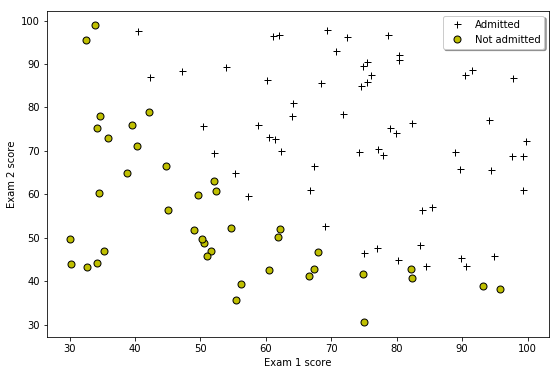

In [4]:
print('Plotting data with + indicating (y = 1) examples and o '\
      'indicating (y = 0) examples.')

plt.figure(figsize=(9, 6))
plotData(X, y)

# Put some labels
# Labels and Legend
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')

# Specified in plot order
plt.legend(['Admitted', 'Not admitted'], loc='upper right', shadow=True)
None

In [5]:
## Part 2: Compute Cost and Gradient

def sigmoid(z):
    g = 1 / (1 + np.exp(-z))

    return g


def costFunction(theta, X, y):
    m = len(y)
    
    z = X.dot(theta)
    h = sigmoid(z)
    
    J = (-y.dot(np.log(h)) - (1 - y).dot(np.log(1 - h))) / m
    grad = (h - y).dot(X) / m
    
    return J, grad

In [6]:
#  Setup the data matrix appropriately, and add ones for the intercept term
m, n = np.shape(X)

# Add intercept term to x and X_test
X = np.c_[np.ones(m), X]

# Initialize fitting parameters
initial_theta = np.zeros(n + 1)

# Compute and display initial cost and gradient
cost, grad = costFunction(initial_theta, X, y)

np.set_printoptions(precision=4)
print('Cost at initial theta (zeros): {:.3f}'.format(cost));
print('Expected cost (approx): 0.693');
print('Gradient at initial theta (zeros): ');
print(' {} '.format(grad));
print('Expected gradients (approx):\n [-0.1000  -12.0092 -11.2628]');

# Compute and display cost and gradient with non-zero theta
test_theta = np.array([-24, 0.2, 0.2])
cost, grad = costFunction(test_theta, X, y)

np.set_printoptions(precision=3)
print('\nCost at test theta: {:.3f}'.format(cost));
print('Expected cost (approx): 0.218');
print('Gradient at test theta: ');
print(' {} '.format(grad));
print('Expected gradients (approx):\n [0.043 2.566 2.647]');

Cost at initial theta (zeros): 0.693
Expected cost (approx): 0.693
Gradient at initial theta (zeros): 
 [ -0.1    -12.0092 -11.2628] 
Expected gradients (approx):
 [-0.1000  -12.0092 -11.2628]

Cost at test theta: 0.218
Expected cost (approx): 0.218
Gradient at test theta: 
 [0.043 2.566 2.647] 
Expected gradients (approx):
 [0.043 2.566 2.647]


In [7]:
## Part 3: Optimizing using minimize

def plotDecisionBoundary(theta, X, y):
    # Plot Data
    plotData(X[:, 1:], y)
    
    # Only need 2 points to define a line, so choose two endpoints
    plot_x = np.array([min(X[:, 1]) - 2, max(X[:, 1]) + 2])
        
    # Calculate the decision boundary line
    plot_y = -(theta[1] * plot_x + theta[0]) / theta[2]
        
    # Plot, and adjust axes for better viewing
    plt.plot(plot_x, plot_y)
    

/usr/local/Cellar/python3/3.6.4_2/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:15: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app


Cost at theta found by minimize: 0.203
Expected cost (approx): 0.203
Theta found by minimize:
 [-25.148   0.206   0.201] 
Expected theta (approx):
 [-25.161   0.206   0.201]


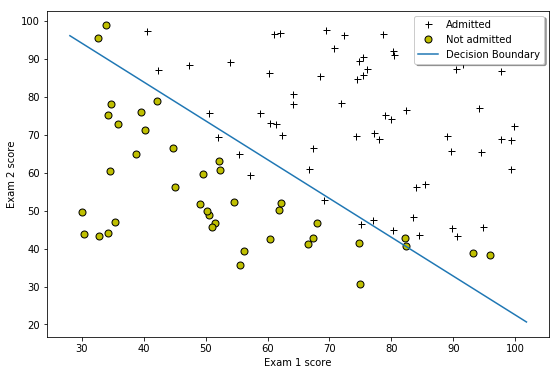

In [8]:
#  Set options for minimize
options = {'maxiter': 400}

#  Run minimize to obtain the optimal theta
#  This function will return information of training
result = minimize(lambda t: costFunction(t, X, y), initial_theta, 
    method='CG',jac=True, options=options)
theta = result['x']
cost = result['fun']

# Print theta to screen
print('Cost at theta found by minimize: {:.3f}'.format(cost))
print('Expected cost (approx): 0.203')
print('Theta found by minimize:')
print(' {} '.format(theta))
print('Expected theta (approx):')
print(' [-25.161   0.206   0.201]')

# Plot Boundary
plt.figure(figsize=(9, 6))
plotDecisionBoundary(theta, X, y)

# Put some labels
# Labels and Legend
plt.xlabel('Exam 1 score')
plt.ylabel('Exam 2 score')

plt.legend(['Admitted', 'Not admitted', 'Decision Boundary'], 
          loc='upper right', shadow=True)
None

In [9]:
## Part 4: Predict and Accuracies

def predict(theta, X):
    m = len(X)
    
    p = np.zeros(m)
    
    z = X.dot(theta)
    h = sigmoid(z)
    
    p[h >= 0.5] = 1
    
    return p

In [10]:
#  Predict probability for a student with score 45 on exam1
#  and score 85 on exam 2

prob = sigmoid(np.array([1, 45, 85]).dot(theta))
print('For a student with scores 45 and 85, we predict an admission '\
      'probability of {:.3f}'.format(prob))
print('Expected value: 0.775 +/- 0.002\n')

# Compute accuracy on our training set
p = predict(theta, X)

print('Train Accuracy: {:.1f}'.format(np.mean(p == y) * 100))
print('Expected accuracy (approx): 89.0\n')

For a student with scores 45 and 85, we predict an admission probability of 0.776
Expected value: 0.775 +/- 0.002

Train Accuracy: 89.0
Expected accuracy (approx): 89.0

